# Documentation of the MLA group work
----------
**Anomaly detection in pneumatic cylinder production**

**MLA Group 37**

**Winter semester 2023/2024**

**Group Members:**
- León Seyer 2922296
- Husam Hamu 2420280
- Levent Aytemiz 2513935
- Nicklas Noel Seyer 2318033


## Content
------------

1. [Introduction](#introduction)
2. [Data Exploration](#exploration)
3. [Concept and Methodology](#concept)
4. [Presentation and Evaluation of Results](#results)
5. [Applicability Analysis and Outlook](#outlook)



## 1. Introduction<a class="anchor" id="introduction"></a>
-------------------
The underlying subject of this project is the manufacturing process of a pneumatic cylinder. The cylinder consists of a piston rod and a cylinder bottom part that are produced separately in a series of cutting-off processes and then mounted together. The task of this endeavour is the application of machine learning to automatically identify nonconforming parts based on the internal sensor data of the machine tool. This project will only take the cylinder bottom part into consideration. An allocation of approximately 600 samples including the sensor data of the milling machine and information about the quality of the produced pieces is therefore provided. The quality is classified into classes 1 to 3 for defective components and 0 for flawless components. 

The primary aim is to ensure a high quality of the products while reducing quality control expenses. However, eploring the data using machine learning could also lead to a better understanding of the causes of the appearance of defective components. This might enable the removal of machine failure leading to a more efficient and more stable manufacturing chain.

In order to train the best model for the given task, the data has to be inspected beforehand. This will ensure that sufficient insight into the nature of the data is obtained to ideally preparate it for the training and to choose the best suited machine learning methods. In the next step, a selection of various seemingly suitable methods (e.g. support vector machines, decision trees and CNNs) are tested to find the most accurate model.


## 2. Data Exploration<a class="anchor" id="exploration"></a>
-------------------

Explore the given database and summarize the most important findings. The following topics and questions might be used as a guidance:
- Use statistical measures
- Use visualization techniques
- Develop hypotheses regarding the data
- Which of the findings might be relevant for the development of your model?

In [2]:
import h5py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
import scipy

from helper_functions import read_data, read_sensor, TimeFeatures
from visualisation_functions import * 
from visualisation_functions import plot_histograms

e:\programms\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Read the features or load them 
features = read_data()

# Replace 2 and 3 classes with 1
features['anomaly'].replace({2: 1, 3: 1}, inplace=True)
features.head()

features exist, loading features


,anomaly,frontside_NCLine_mean,frontside_NCLine_rms,frontside_NCLine_abs_mean,frontside_NCLine_kurtosis,frontside_NCLine_skew,frontside_NCLine_coef_var,frontside_NCLine_zptp,frontside_NCLine_crest,frontside_NCLine_impulse_factor,...,backside_aaLoad6_abs_mean,backside_aaLoad6_kurtosis,backside_aaLoad6_skew,backside_aaLoad6_coef_var,backside_aaLoad6_zptp,backside_aaLoad6_crest,backside_aaLoad6_impulse_factor,backside_aaLoad6_margin_factor,backside_aaLoad6_shape_factor,backside_aaLoad6_clearance_factor
0,0,10250.520118,16738.308383,10250.520118,1.761682,1.630981,1.290905,25010.0,1.494177,4.879752,...,11.639013,16.730432,3.745985,1.429771,49.99845,2.462071,8.591528,6.271844,1.744777,12.543689
1,0,10302.448479,16794.006144,10302.448479,1.717426,1.620368,1.287331,25010.0,1.489222,4.855157,...,12.468797,14.916573,3.605527,1.408085,49.99845,2.321811,8.019772,5.743018,1.727051,11.486035
2,0,10219.527914,16780.533999,10219.527914,1.786559,1.642597,1.302377,25010.0,1.490417,4.894649,...,12.341240,14.283759,3.497233,1.410779,49.99845,2.342829,8.102662,5.885029,1.729247,11.770059
3,0,10232.852941,16738.874235,10232.852941,1.761771,1.632376,1.294540,25010.0,1.494127,4.888177,...,12.191711,14.133796,3.570962,1.482667,49.99845,2.293149,8.202040,6.038904,1.788379,12.077808
4,0,10298.421675,16849.970451,10298.421675,1.721618,1.627173,1.295011,25010.0,1.484276,4.857055,...,11.277057,18.659076,3.888678,1.380268,49.99845,2.601222,8.867287,6.309797,1.704447,12.619594


### 2.1 Overview of mean time series
In order to get an overview about the provided data, that should be used as input data for training a machine learning model, first of all the entire process data are plotted as time series. So we can detect the sensors characteristic timeseries and estimate how meaningful the data of each sensor are. As result we might recognize specific patterns, that indicate, wheter the parts have an anomaly or not. For this goal it makes sense to extract the data of parts with anomaly and not, so that we can plot the mean time series for both seperately. If we can recognize specific deviations between the mean timeseries for a specific sensor, this data would be promising to further process and use for training a machine learning model. Some interesting time series are shown below.

In [3]:
data_anomaly_pass=features["anomaly"].loc[features.anomaly==0]            # selects the parts, in which the value for the column "anomaly" is zero
data_anomaly_pass_not=features["anomaly"].loc[features.anomaly!=0]        # selects the parts, in which the value for the column "anomaly" is not zero   

q=data_anomaly_pass  # first the mean time series for parts without anomalies are created, so this parts are selected

n_sensor=0 # frontside_internal_machine_signals
frontside_internal_pass_mean=summation_function(n_sensor,q)  # by recalling summation function the mean time series of this sensor is created

n_sensor=2 # frontside_external_sensor_signals
frontside_external_pass_mean=summation_function(n_sensor,q)

n_sensor=5 # backside_internal_machine_signals
backside_internal_pass_mean=summation_function(n_sensor,q)

n_sensor=4 # backside_external_sensor_signals
backside_external_pass_mean=summation_function(n_sensor,q)


# mean time series for parts with anomalies are created
q=data_anomaly_pass_not

n_sensor=0
frontside_internal_pass_not_mean=summation_function(n_sensor,q)

n_sensor=2
frontside_external_pass_not_mean=summation_function(n_sensor,q)

n_sensor=5
backside_internal_pass_not_mean=summation_function(n_sensor,q)

n_sensor=4
backside_external_pass_not_mean=summation_function(n_sensor,q)

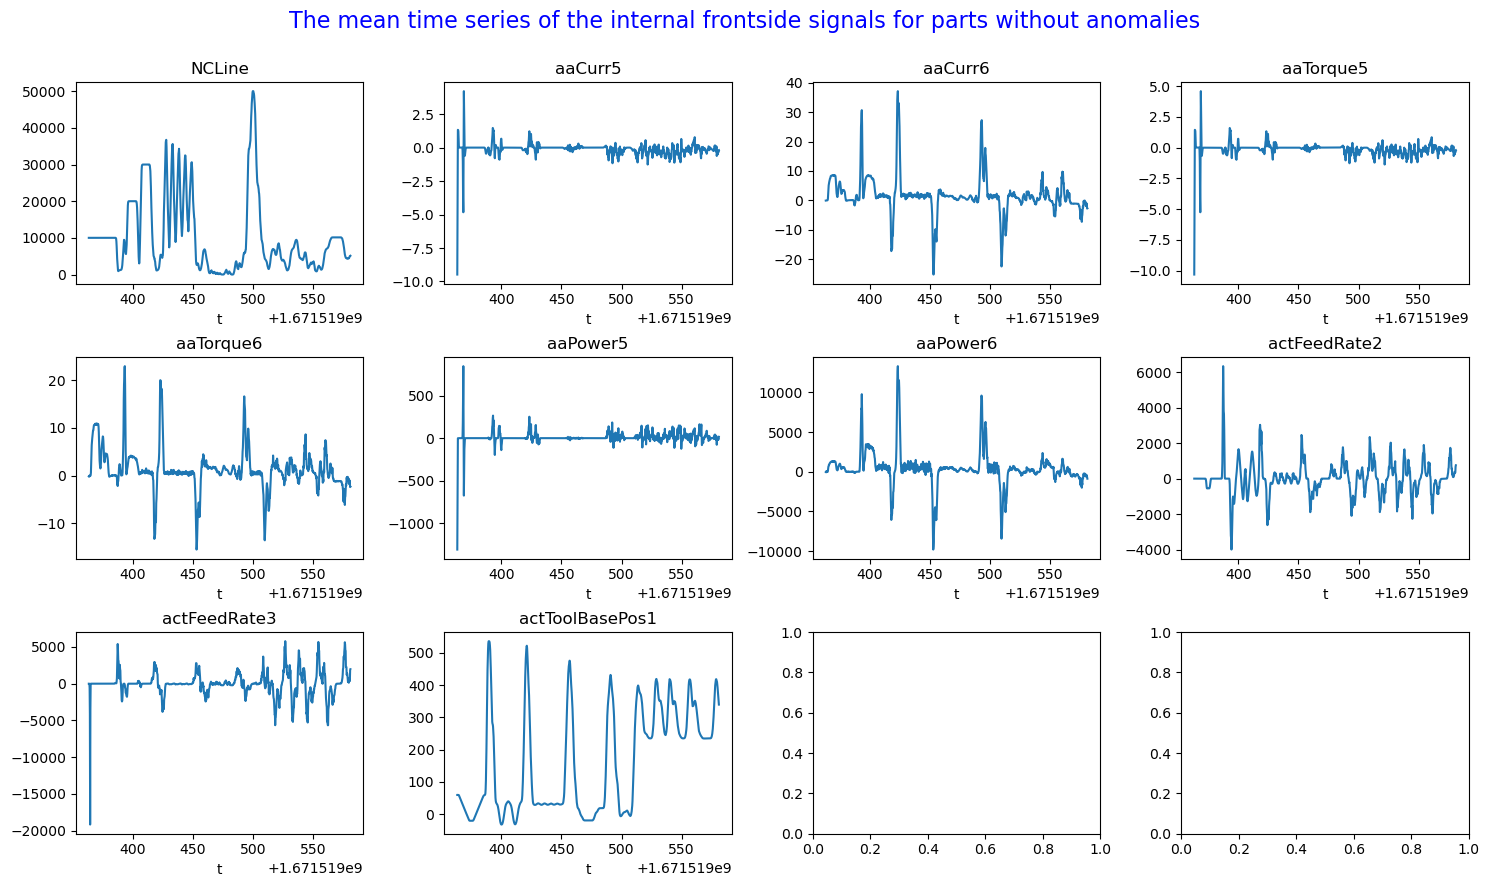

In [4]:
sensors=["NCLine","aaCurr5","aaCurr6","aaTorque5","aaTorque6","aaPower5","aaPower6","actFeedRate2", "actFeedRate3","actToolBasePos1"]
title = "The mean time series of the internal frontside signals for parts without anomalies"
plot_function(frontside_internal_pass_mean,sensors, title, 0.9)

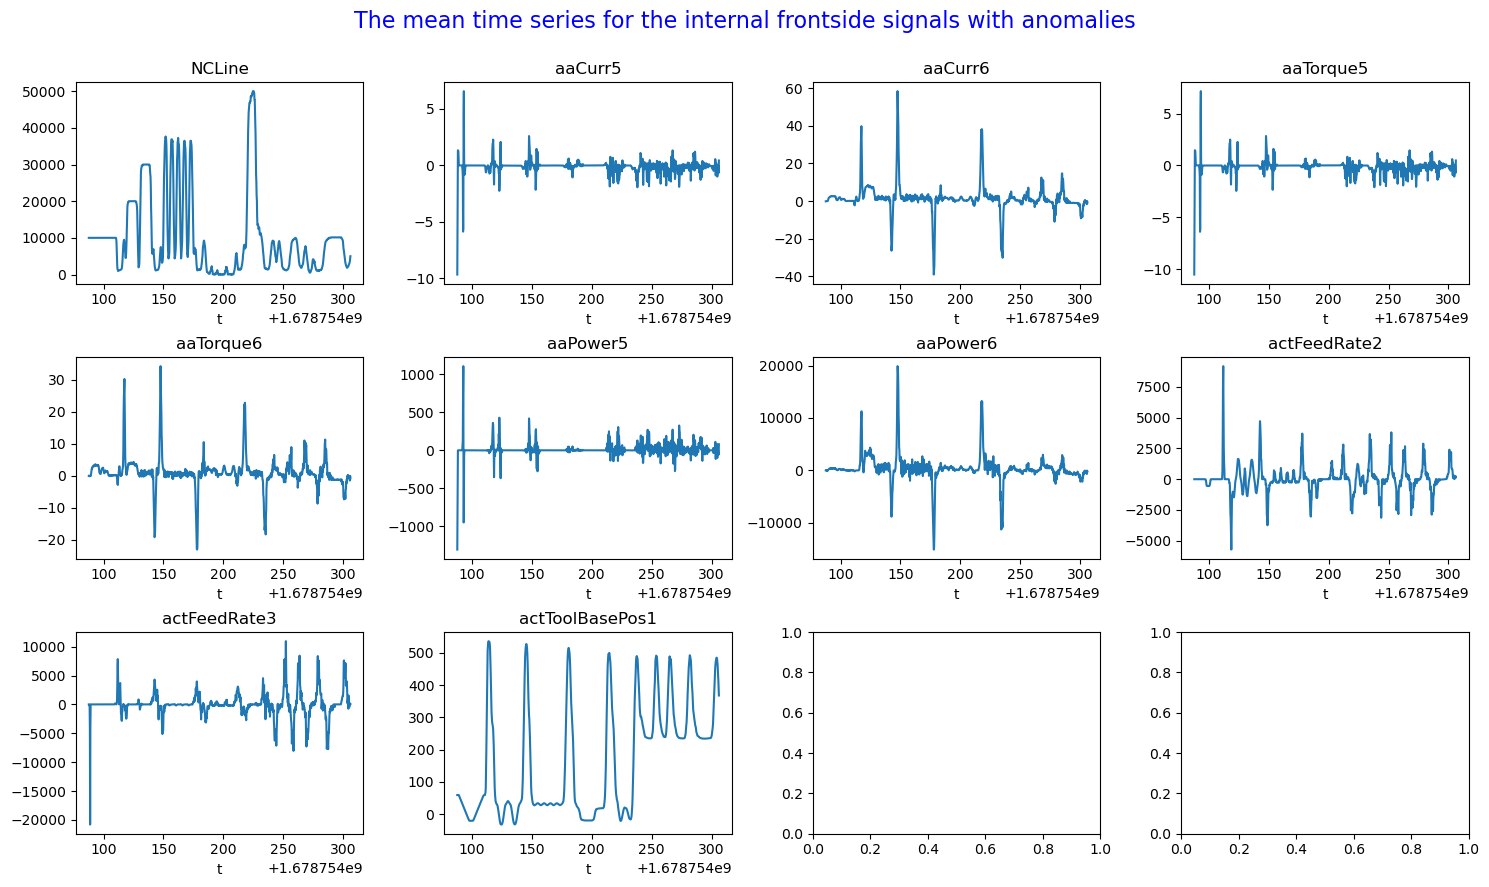

In [5]:
sensors=["NCLine","aaCurr5","aaCurr6","aaTorque5","aaTorque6","aaPower5","aaPower6","actFeedRate2", "actFeedRate3","actToolBasePos1"]
title = "The mean time series for the internal frontside signals with anomalies"
plot_function(frontside_internal_pass_not_mean,sensors, title, 0.9)

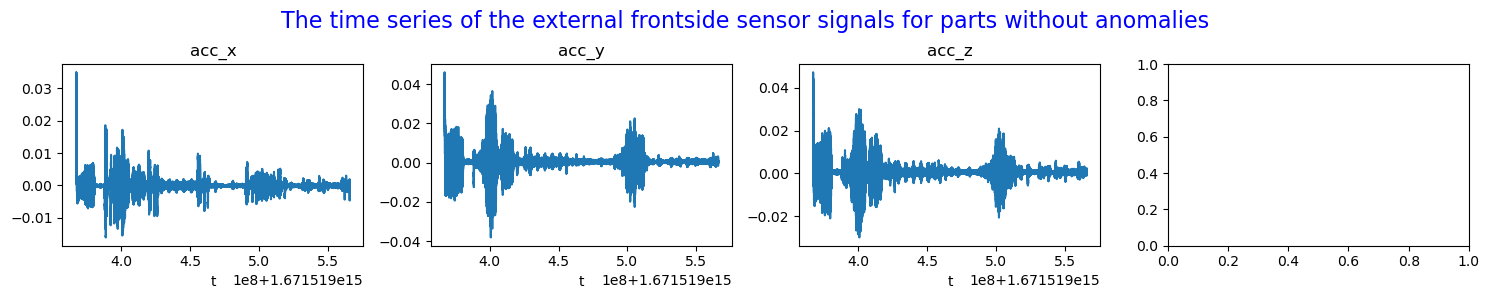

In [6]:
sensors=["acc_x","acc_y","acc_z"]
title = "The time series of the external frontside sensor signals for parts without anomalies"
plot_function(frontside_external_pass_mean,sensors, title, 0.8)

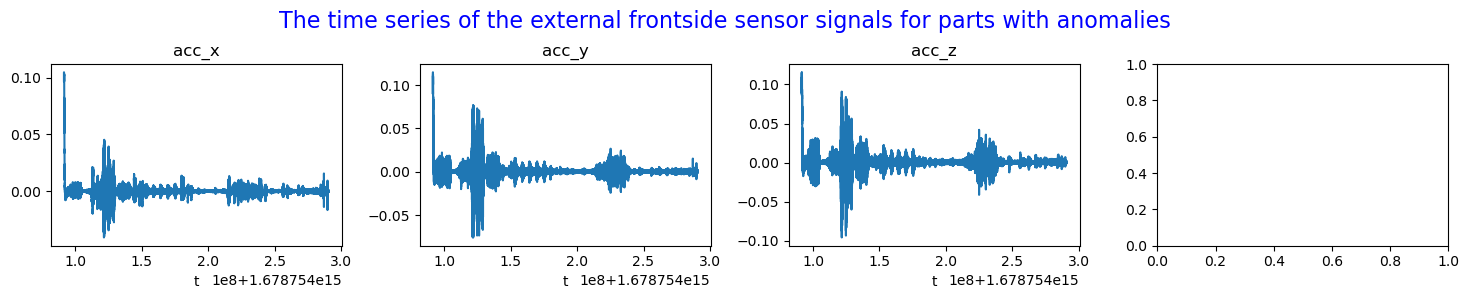

In [7]:
sensors=["acc_x","acc_y","acc_z"]
title = "The time series of the external frontside sensor signals for parts with anomalies"
plot_function(frontside_external_pass_not_mean,sensors,title, 0.8)

### 2.2 Exploration and Visualization of the most promising features


In [ ]:
# Load selected features
selected_features_names = pd.read_csv("selected_features_names.csv")["column_names"].tolist()

# Keep only the selected features
selected_features = pd.concat([features[feature] for feature in selected_features_names], axis=1)
selected_features = pd.concat([features["anomaly"],selected_features], axis=1)
selected_features['anomaly'].replace({2: 1, 3: 1}, inplace=True)


For the mean time series you can recognize small differences. On the one hand the peaks for the parts with no anomalies are not so fluctuating compared to each other, and there are maybe a bit more and stronger peaks. The Margin Factor (Ahmed2020) represents the ratio between instantaneous peak and mean of square root, while the impulse factor describes the ratio between maximum value and the absolute mean. So its explainable that for more parts without anomalies the impulse factors and margin factors are higher, compared to the parts with anomalies.

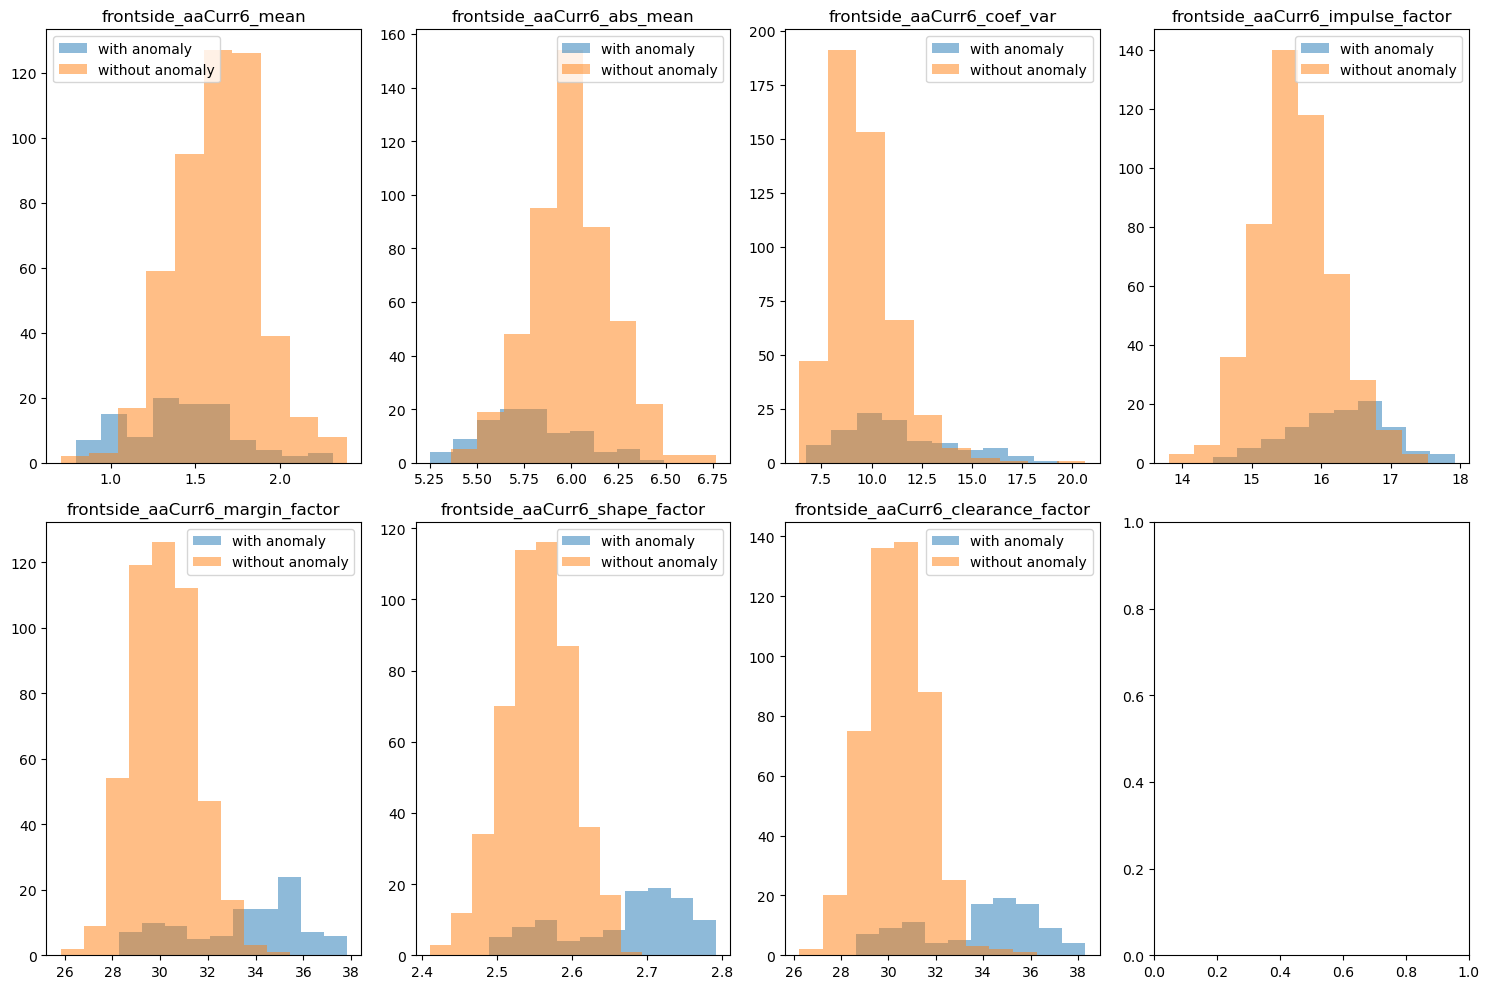

In [33]:
plot_histograms(5, 12, selected_features) 

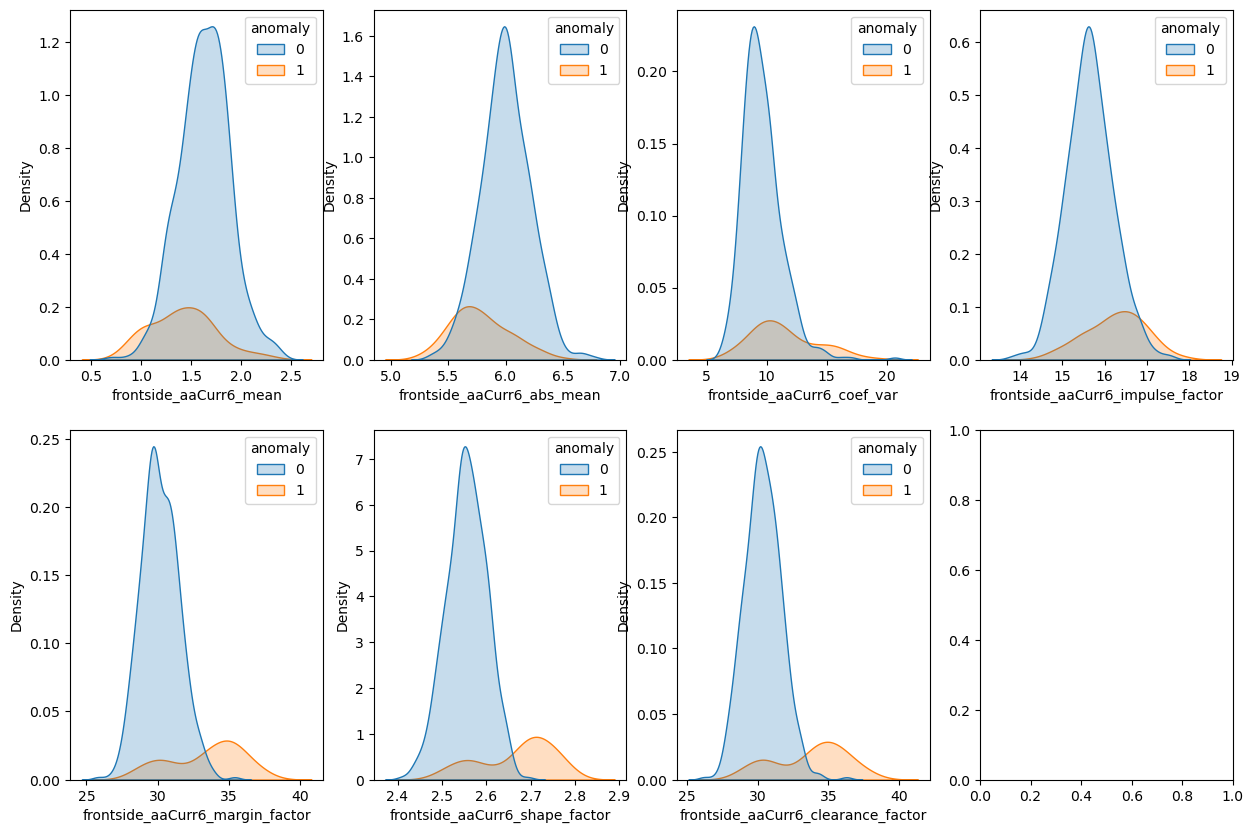

In [35]:
plot_density(5,12, selected_features) 

You can see, that the peak of the density function for the absolute mean value of the timeseries in this sensor for parts with no anomaly is shifted to higher values in comparison to parts with anomaly. Especially for the features frontside_aaCurr6_margin_factor, frontside_aaCurr6_shape_factor and frontside_aaCurr6_clearance_factor the distributions for parts with and without anomaly are significant shifted, so that they seem to be promising features to use for training. The Margin Factor (Ahmed2020) represents the ratio between instantaneous peak and mean of square root. From the illustration of the timeseries the shifts of the distributions between parts with anomaly and no anomaly are expectable for the margin-factor and the impulse factor, which represents the ratio between maximum value and the absolute mean values.

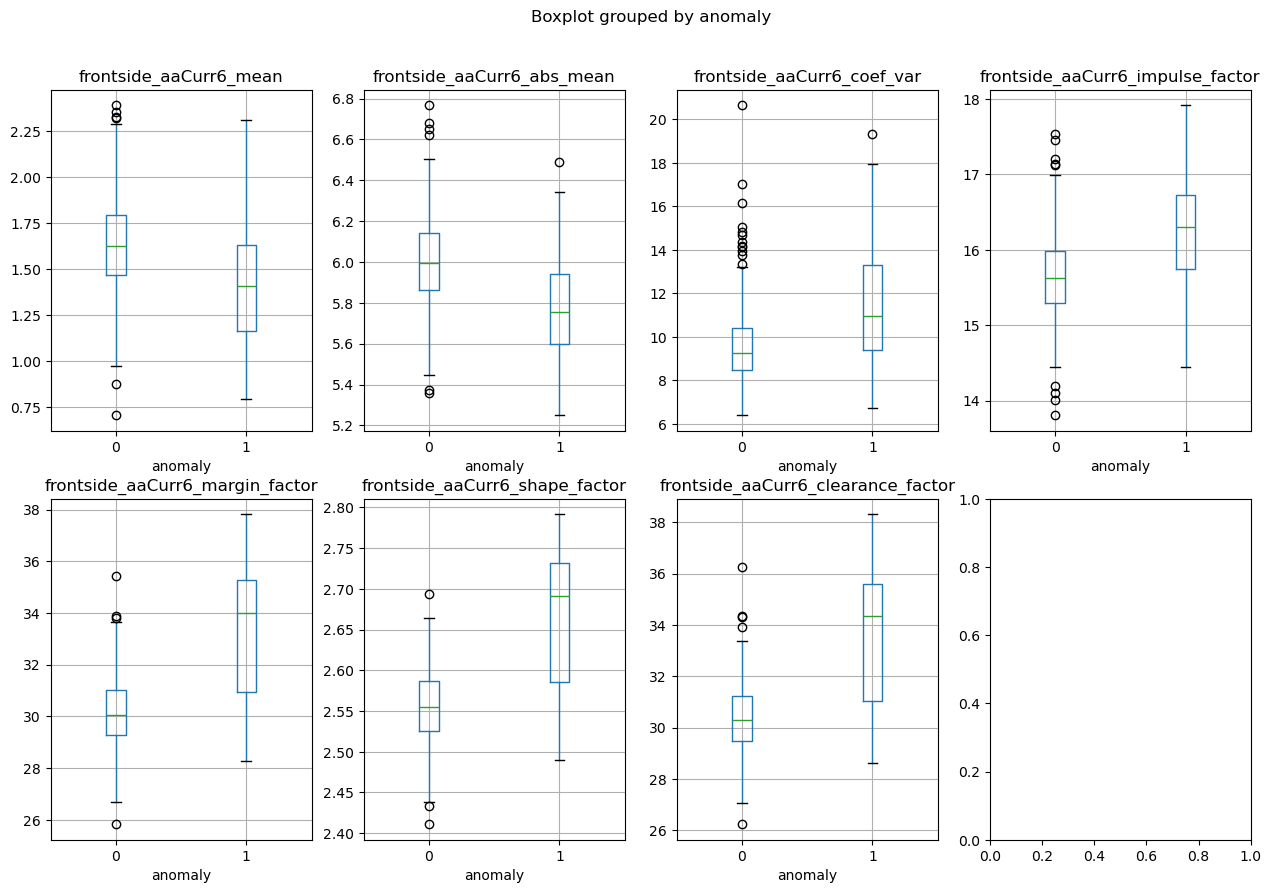

In [37]:
box_plot(5,12, selected_features) 

Although for the mean time series you could recognize some differences like the higher excitations for parts with anomaly you can see that for the selected features the distributions are overlapping much, so that the parts can't be seperated well by this features. As consequence this features would only have an slight impact for training a model and detect the anomalies for a test set.

### 2.3 Visualization for manual feature selection

A jupyter notebook was created for filtering parts based on their cnc milling machina anomaly class and then selecting one of it's sensor data files. The signals of the file can then be plotted for a comparison between different anomaly classes. The frontside external sensor data signals appear to be well suited for anomaly detection, with the class 0 signals being similar to each other, while anomalous parts often show different signal levels and higher spikes in the signal which are not present at the same level in the normal parts' signals:

## 3. Concept and Methodology<a class="anchor" id="concept"></a>
-------------------

The proposed solution followed a standard machine learning pipeline, which can be aligned with the CRISP-DM model. The pipeline consisted of the following steps:
- Data understanding: The data was explored and analyzed to understand its characteristics, such as the distribution of the features and the labels, the correlation between the features and the labels, and the presence of outliers or missing values.
- Data preparation: The data was preprocessed and transformed to make it suitable for the machine learning models. This included feature selection, data splitting, class imbalance handling, and feature scaling.
- Modeling: Several machine learning models were trained and evaluated on the data, such as a multilayer perceptron (MLP), a support vector machine (SVM), and a random forest (RF). The models were compared based on their accuracy, recall, precision, and confusion matrix. A voting classifier was also used to combine the predictions of the individual models and improve the performance.
- Evaluation: The results of the modeling were interpreted and discussed, highlighting the strengths and weaknesses of the different models and the voting classifier.

The following subsections describe each step of the pipeline in more detail and justify the choices of the methods, procedures, and algorithms.


### 3.1 Data understanding
We have allready talked about this in previous sections.

### 3.2 Models using features automatically selected by correlation

#### 3.2.1 Data preparation
The data preparation step aimed to reduce the dimensionality, noise, and skewness of the data, and to make it more suitable for the machine learning models. The following substeps were performed:

- **Feature extraction:** To capture the characteristics of the time series, various statistical measures were computed for each sensor, such as mean, root mean square, kurtosis, skewness, coefficient of variation, zero-peak-to-peak, crest factor, impulse factor, margin factor, shape factor, and clearance factor. These features were chosen based on their ability to describe the shape, spread, and variability of the time series.
These features capture different aspects of the time series data, such as its central tendency, dispersion, shape, and peakiness. They help the machine learning model to understand the patterns and variations in the data, and how they relate to the label. By using these features together, the model can learn from multiple perspectives and dimensions of the data, and make more accurate and robust predictions. These features are also widely used and proven in the literature of time series analysis and machine learning, and they have been shown to be effective for various applications. This resulted in 900 features for each data point

In [4]:
# examples of possible features
## Timeseries Features
class TimeFeatures:
    def __init__(self) -> None:
        pass
    #1 'mean'

    #2 'max'

    #3 'min'

    #4 rms
    def rms(x):
        #lambda x: np.sqrt(sum(x**2)/x.size)
        res = np.sqrt(np.mean(x**2))
        return res

    #5 abs_mean
    def abs_mean(x):
        res = np.mean(np.abs(x))
        return res

    #6 scipy.stats.kurtosis()
    def kurtosis(x):
        res = scipy.stats.kurtosis(x)
        return res

    #7 scipy.stats.skew()
    def skew(x):
        res = scipy.stats.skew(x)
        return res

    #8 std deviation

    #9 coefficient of variation
    def coef_var(x):
        res = scipy.stats.variation(x)
        return res

    #9 zero peak to peak: np.ptp (Barsczc2019)
    def zptp(x):
        res = np.ptp(x)/2
        return res

    #10 Crest Factor 
    def crest(x):
        res = (np.ptp(x)/2)/TimeFeatures.rms(x)
        return res

    #11 Impulse Factor (Ahmed2020/Wang2019b)
    def impulse_factor(x):
        res = x.max()/x.abs().mean()
        return res

    #12 Margin Factor (Ahmed2020)
    def margin_factor(x):
        peak= np.ptp(x)/2
        res = peak/((np.mean(np.sqrt(np.abs(x))))**2)
        return res

    #13 Shape Factor (Ahmed2020/Wang2019b)
    def shape_factor(x):
        rms = np.sqrt(np.mean(x**2))
        res = rms/(np.mean(np.abs(x)))
        return res

    #14 Clearance Factor (Ahmed2020/Wang2019b)
    def clearance_factor(x):
        res = x.max()/((np.mean(np.sqrt(np.abs(x))))**2)
        return res

- **Feature selection:** The second step was to perform feature selection, which is the process of reducing the dimensionality of the data by selecting only the most relevant and informative features for the classification task. Feature selection can improve the performance, efficiency, and interpretability of the machine learning models, as well as reduce the risk of overfitting and noise.
The feature selection method used in this project was correlation-based, which means that the features that had a high correlation with the label were kept, while the features that had a low correlation with the label were discarded. The correlation measure used was the Pearson correlation coefficient, which ranges from -1 to 1, and indicates the strength and direction of the linear relationship between two variables. The correlation between each feature and the label was computed using the corrwith() function from the pandas library, which returns a series of correlation values. A threshold of 0.1 was set to filter out the features that had a correlation value lower than that. This feature selection method reduced the number of features from 900 to 161, which is a significant reduction.


In [5]:
def feature_with_high_correlation(features):
    
    # 'anomaly' is the label column
    label_column = 'anomaly'
    
    # Compute the correlation matrix
    correlation_matrix = features.corrwith(features[label_column])
    
    # Create a DataFrame with the correlation values
    correlation_df = pd.DataFrame(correlation_matrix, columns=['Correlation with ' + label_column])

    # Set the correlation range boundaries
    lower_bound = -0.1
    upper_bound = 0.1
    
    # Filter columns based on correlation range
    low_correlation_columns = correlation_df[
        (correlation_df['Correlation with ' + label_column] >= lower_bound) &
        (correlation_df['Correlation with ' + label_column] <= upper_bound)
    ]
    
    high_correlation_columns = correlation_df[
        (correlation_df['Correlation with ' + label_column] < lower_bound) |
        (correlation_df['Correlation with ' + label_column] > upper_bound)
    ]
    
    # Extract column names from the DataFrames
    low_corr_column_names = low_correlation_columns.index
    high_corr_column_names = high_correlation_columns.index
    
    # Create separate DataFrames based on correlation range
    features_low_corr = features[low_corr_column_names]
    features_high_corr = features[high_corr_column_names]

    return correlation_df, features_low_corr, features_high_corr


- **Data splitting:** The data was split into two subsets: a training set and a validation set. The training set was used to train the machine learning models, while the validation set was used to evaluate the performance of the machine learning models on unseen data. The data splitting was done using the train_test_split() function from the sklearn.model_selection library, which randomly shuffles and splits the data according to a given ratio. The ratio used in this project was 0.8, which means that 80% of the data was assigned to the training set, and 20% of the data was assigned to the validation set. The data splitting also ensured that the class distribution was stratified, which means that the proportion of normal and anomalous signals was preserved in both subsets

In [6]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

def create_dataset(df):
    # Assuming your dataframe is called df and your label column is called anomaly
    # Split the dataframe into 80% train and 20% test, stratifying by the label column
    train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['anomaly'], shuffle=True)

    # Print the shape and label distribution of each set
    print('Train set shape:', train_df.shape)
    print('Train set label distribution:\n', train_df['anomaly'].value_counts(normalize=True))
    print('Validation set shape:', val_df.shape)
    print('Validation set label distribution:\n', val_df['anomaly'].value_counts(normalize=True))

    return train_df, val_df



- **Class imbalance handling:** The data was imbalanced. This can cause the machine learning models to be biased towards the majority class, and ignore or misclassify the minority class. To address this issue, the data was balanced using a synthetic minority oversampling technique (SMOTE), which generates new samples of the minority class by interpolating between existing samples. The SMOTE method was applied using the SMOTE() function from the imblearn.over_sampling library, which takes the sampling_strategy and random_state parameters. The sampling_strategy parameter determines the ratio of the number of samples in the minority class over the number of samples in the majority class after resampling.


In [7]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer


def over_sampling(features):
    # Assuming 'features' is your DataFrame
    # Separate features and labels
    X = features.drop('anomaly', axis=1)
    y = features['anomaly']
    
    # Define the oversampling ratios for each class
    # oversampling_ratios = {0: 313, 1: 65*3}
    oversampling_ratios = {0: 490, 1: 54*3, 2: 21*4, 3: 7*6}
    
    # Impute missing values using mean imputation
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    
    # Initialize SMOTE with specified sampling_strategy
    # and set random_state for reproducibility
    smote = SMOTE(sampling_strategy=oversampling_ratios, random_state=42)
    
    # Fit and apply the resampling
    X_resampled, y_resampled = smote.fit_resample(X_imputed, y)
    
    # Combine the resampled features and labels into a new DataFrame
    resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='anomaly')], axis=1)
    
    # Display the new class distribution
    print(resampled_df['anomaly'].value_counts())
    return resampled_df


- **Feature scaling:** The data was scaled using a standard scaler, which transforms the data such that each feature has a mean of zero and a standard deviation of one. This can improve the performance of the machine learning models that are sensitive to the scale and range of the features, such as neural networks and support vector machines. The data scaling was done using the StandardScaler() function from the sklearn.preprocessing library, which fits the scaler to the training set and then applies it to both the training set and the validation set.


In [8]:
import joblib
def preprocess_data(train_df, val_df):

    label_column = 'anomaly'
    # Extract features (X) and labels (y) from the DataFrames
    X_train = train_df.drop(columns=[label_column])
    y_train = train_df[label_column]
    
    X_val = val_df.drop(columns=[label_column])
    y_val = val_df[label_column]

    
    # Impute missing values using mean imputation
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    
    X_val = imputer.fit_transform(X_val)
    
    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    X_val = scaler.transform(X_val)
    
    # Save the scalar and imputer model using joblib
    joblib.dump(scaler, 'scalar.joblib')
    joblib.dump(imputer, 'imputer.joblib')
    
    return X_train, y_train, X_val, y_val
    

In [9]:
# Step 1: read features
features = read_data()

# Step 2: selecting features with high correlation
correlation_df, features_low_corr, features_high_corr = feature_with_high_correlation(features)

# Step 3: Check if more than 20% of values in a column are null
columns_to_remove = features_high_corr.columns[features_high_corr.isnull().mean() > 0.2]

# Step 4: Remove columns with mostly NaN values
features_high_corr = features_high_corr.drop(columns=columns_to_remove)

# Step 5: create datasets
train_df, val_df = create_dataset(features_high_corr)

# Step 6: replace 2 and 3 classes with 1
train_df['anomaly'].replace({2: 1, 3: 1}, inplace=True)
val_df['anomaly'].replace({2: 1, 3: 1}, inplace=True)

features exist, loading features
Train set shape: (473, 162)
Train set label distribution:
 anomaly
0    0.826638
1    0.114165
2    0.044397
3    0.014799
Name: proportion, dtype: float64
Validation set shape: (119, 162)
Validation set label distribution:
 anomaly
0    0.831933
1    0.109244
2    0.042017
3    0.016807
Name: proportion, dtype: float64


e:\programms\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
e:\programms\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
e:\programms\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
e:\programms\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
e:\programms\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
e:\programms\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\Husam\AppData\Local\Temp\ipykernel_13492\3717230430.py:17: FutureWa

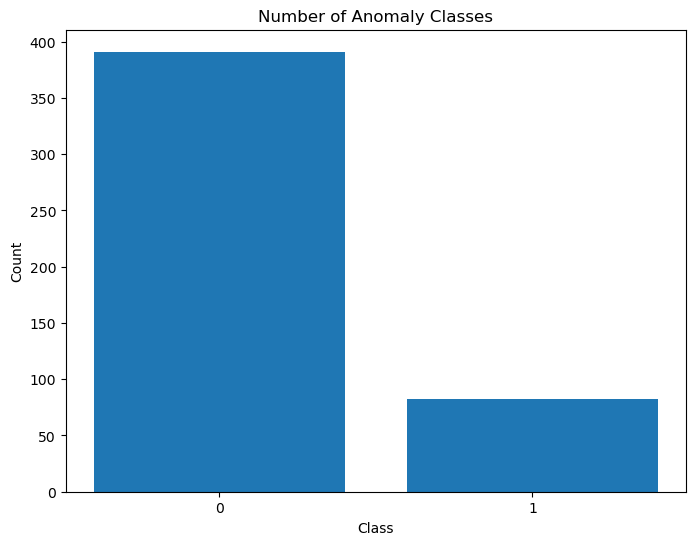

In [27]:
import matplotlib.pyplot as plt

# Assuming 'anomaly' column contains the classes
class_counts = train_df['anomaly'].value_counts()
# class_counts[1] = 288
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xticks([0, 1])  # Set x-ticks to show all classes

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Anomaly Classes')
plt.show()


#### 3.2.2 Modeling and Evaluation
Several machine learning models were trained and evaluated on the prepared data, using different algorithms and parameters. The models were compared based on their accuracy, recall, precision, F1 score, and confusion matrix. Accuracy is the proportion of correctly classified data points, recall is the proportion of actual positives that are correctly classified as positives, precision is the proportion of predicted positives that are correctly classified as positives. The following models were used:

- **Multilayer perceptron (MLP):** This is a type of artificial neural network that consists of multiple layers of neurons, with each layer connected to the next one. The MLP can learn complex nonlinear patterns from the data, and can be customized by changing the number and size of the layers, the activation function of the neurons, the regularization parameter, and the number of iterations. The MLPClassifier() function from sklearn.neural_network was used, with the following parameters: hidden_layer_sizes=(128, 64), activation=‘relu’, alpha=0.01, max_iter=20, random_state=42. These parameters were chosen based on trial and error. The hidden_layer_sizes parameter specifies the number and size of the hidden layers, with 128 neurons in the first layer and 64 neurons in the second layer. The activation parameter specifies the activation function of the neurons, which was set to ‘relu’, which is a common and effective choice for neural networks. The alpha parameter specifies the regularization parameter, which controls the amount of penalty for the complexity of the model, and was set to 0.01, which is a moderate value that prevents overfitting. The max_iter parameter specifies the maximum number of iterations for the gradient descent algorithm, which was set to 20, which is a reasonable value that ensures convergence.

In [10]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score

# Preprocess data
X_train, y_train, X_val, y_val = preprocess_data(train_df, val_df)


# Create the MLPClassifier model
model_MLP = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', alpha=0.01, max_iter=25, random_state=42)

# Train the model
model_MLP.fit(X_train, y_train)

# Evaluate the model on the validation set
val_accuracy = model_MLP.score(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Predict on the test set
y_pred_mlp = model_MLP.predict(X_val)

# Compute classification report 
classification_rep = classification_report(y_val, y_pred_mlp, target_names=[f'Class {i}' for i in np.unique(y_val)])

print("\nClassification Report:")
print(classification_rep)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val, y_pred_mlp)
recall = recall_score(y_val, y_pred_mlp, average='weighted')
precision = precision_score(y_val, y_pred_mlp, average='weighted')
conf_matrix = confusion_matrix(y_val, y_pred_mlp)
score = 100 * f1_score(y_val, y_pred_mlp)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print('The f1-score of the model on the validation set is: {:.2f}%'.format(score))
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute classification report 
classification_rep = classification_report(y_val, y_pred_mlp, target_names=[f'Class {i}' for i in np.unique(y_val)])

print("\nClassification Report:")
print(classification_rep)

Validation Accuracy: 0.9664

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        99
     Class 1       1.00      0.80      0.89        20

    accuracy                           0.97       119
   macro avg       0.98      0.90      0.93       119
weighted avg       0.97      0.97      0.96       119

Accuracy: 0.9663865546218487
Recall: 0.9663865546218487
Precision: 0.9676919311413886
The f1-score of the model on the validation set is: 88.89%

Confusion Matrix:
[[99  0]
 [ 4 16]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        99
     Class 1       1.00      0.80      0.89        20

    accuracy                           0.97       119
   macro avg       0.98      0.90      0.93       119
weighted avg       0.97      0.97      0.96       119



e:\programms\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


- **Support vector machine (SVM):** This is a type of supervised learning algorithm that finds a hyperplane that separates the data points into different classes, with the maximum margin possible. The SVM can handle nonlinearly separable data by using a kernel function that transforms the data into a higher dimensional space, where a linear separation is possible. The svm.SVC() function from sklearn was used, with the following parameters: probability=True. This parameter was chosen to enable the calculation of the decision function, which is the distance of the data points from the hyperplane. The other parameters were left as default, which include the kernel parameter, which specifies the kernel function, and was set to ‘rbf’, which is a common and effective choice for nonlinear data, and the C parameter, which specifies the penalty for the misclassification, and was set to 1, which is a moderate value that balances the margin and the errors.

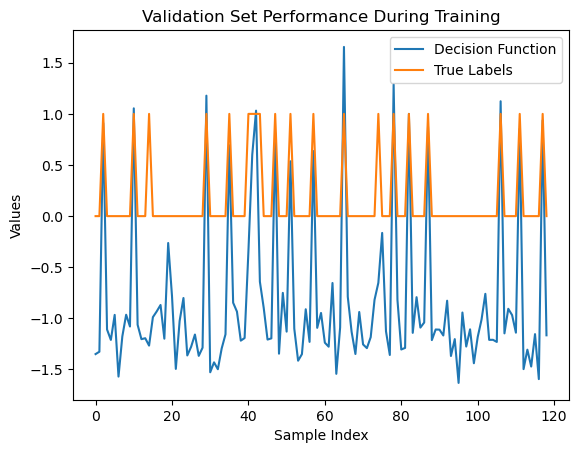

Accuracy: 0.9663865546218487
Recall: 0.9663865546218487
Precision: 0.9676919311413886
The f1-score of the model on the validation set is: 88.89%

Confusion Matrix:
[[99  0]
 [ 4 16]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        99
     Class 1       1.00      0.80      0.89        20

    accuracy                           0.97       119
   macro avg       0.98      0.90      0.93       119
weighted avg       0.97      0.97      0.96       119



In [11]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.utils import shuffle

# Train the SVM classifier
svm_classifier = svm.SVC(probability=True)
svm_classifier.fit(X_train, y_train)

# Visualize the validation performance during training
# Note: This is a simple example; adjust as needed based on your data and model
plt.plot(svm_classifier.decision_function(X_val), label='Decision Function')
plt.plot(y_val.values, label='True Labels')
plt.title('Validation Set Performance During Training')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.show()

# Evaluate the model on the validation set
y_pred_svm = svm_classifier.predict(X_val)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val, y_pred_svm)
recall = recall_score(y_val, y_pred_svm, average='weighted')
precision = precision_score(y_val, y_pred_svm, average='weighted')
conf_matrix = confusion_matrix(y_val, y_pred_svm)
score = 100 * f1_score(y_val, y_pred_svm)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print('The f1-score of the model on the validation set is: {:.2f}%'.format(score))
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute classification report 
classification_rep = classification_report(y_val, y_pred_svm, target_names=[f'Class {i}' for i in np.unique(y_val)])

print("\nClassification Report:")
print(classification_rep)

- **Random forest (RF):** This is a type of ensemble learning algorithm that combines multiple decision trees, each trained on a random subset of the data and the features. The RF can reduce the variance and the overfitting of a single decision tree, by averaging the predictions of the individual trees. The RandomForestClassifier() function from sklearn.ensemble was used, with the following parameters: n_estimators=100, random_state=42. These parameters were chosen based on trial and error and domain knowledge. The n_estimators parameter specifies the number of trees in the forest, which was set to 100, which is a common and effective choice for ensemble learning.


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.utils import shuffle

# Train the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_random_forest = random_forest_classifier.predict(X_val)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_val, y_pred_random_forest)
recall = recall_score(y_val, y_pred_random_forest, average='weighted')
precision = precision_score(y_val, y_pred_random_forest, average='weighted')
conf_matrix = confusion_matrix(y_val, y_pred_random_forest)
score = 100 * f1_score(y_val, y_pred_random_forest)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print('The f1-score of the model on the validation set is: {:.2f}%'.format(score))
print("\nConfusion Matrix:")
print(conf_matrix)
classification_rep = classification_report(y_val, y_pred_random_forest, target_names=[f'Class {i}' for i in np.unique(y_val)])

print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9663865546218487
Recall: 0.9663865546218487
Precision: 0.965952057390613
The f1-score of the model on the validation set is: 89.47%

Confusion Matrix:
[[98  1]
 [ 3 17]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98        99
     Class 1       0.94      0.85      0.89        20

    accuracy                           0.97       119
   macro avg       0.96      0.92      0.94       119
weighted avg       0.97      0.97      0.97       119



In [47]:
feature_importances.shape

(161,)

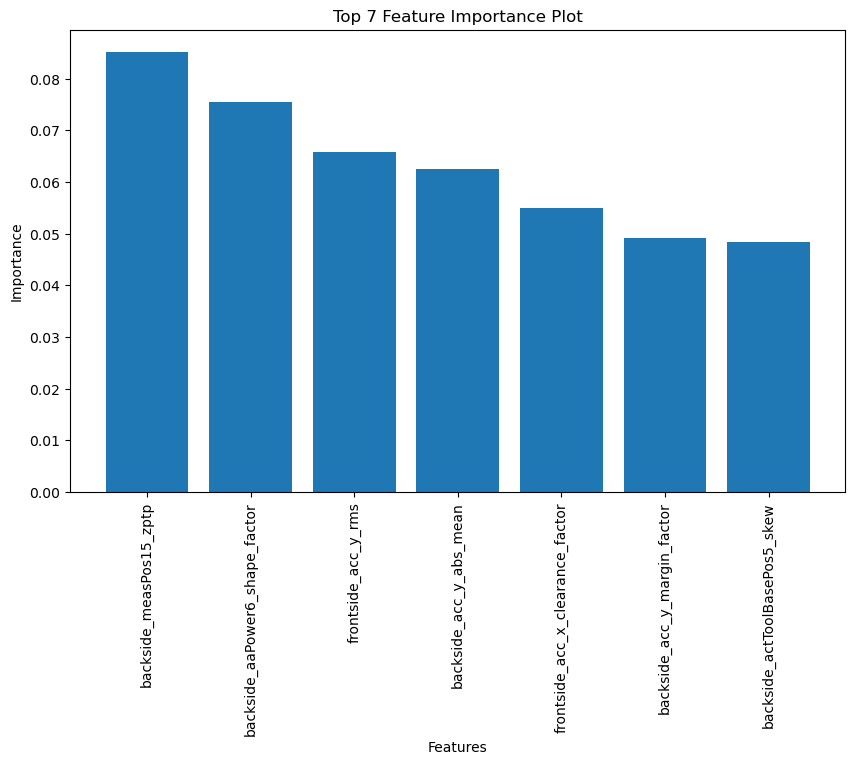

In [51]:
import matplotlib.pyplot as plt

# Get feature importances from the trained random forest classifier
feature_importances = random_forest_classifier.feature_importances_

# Get the names of the features
feature_names = train_df.columns  # Assuming X_train is a DataFrame

# Sort the feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Slice the first 20 elements
top_20_feature_importances = sorted_feature_importances[:7]
top_20_feature_names = sorted_feature_names[:7]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_20_feature_importances)), top_20_feature_importances, tick_label=top_20_feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 7 Feature Importance Plot')
plt.xticks(rotation=90)
plt.show()


- **Time Series Classification using a CNN:** 
For the time series classification, the frontside external sensor data is used. Since the number of parts to which data is available for training is quite low for a neural network, the convolutional neural network trained is relatively small in order to prevent overfitting. Class weights are applied, compensating the imbalance on the training data to some degree. The data of all four sensors is then stored in a three-dimensional array, shuffled and split up into a training set and a test set. The validation split during the training is hadled by the machine learning library.

The neural network is supposed to perform a binary classification, therefore the cnc anomaly data is transformed into a binary shape where 0 means no anomaly and 1 meaning that the part is anomalous.

Again, samples with faulty sensor data are dropped.

A number of different neural networks and hyperparameters has been tested with the following keras model scoring highest on the test data split. In order to compansate the imbalance on the training data, class weights have been applied. The class weights are one for no anomaly and four if an anomaly is present.

In [13]:
# Define Model
model = keras.models.Sequential([
    layers.Input(shape=(497500, 4)),

    layers.Conv1D(filters=2, kernel_size=7),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.1),

    layers.AveragePooling1D(32),
    
    layers.Conv1D(filters=2, kernel_size=3),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.1),

    layers.GlobalAveragePooling1D(),
    
    layers.Dense(units=1, activation="sigmoid"),
])

NameError: name 'keras' is not defined

### 3.3 Models using manually selected features

#### 3.3.1 Decision Tree and Random Forest using manually selected Features

The decision tree and random forest use features extracted from frontside external sensor data. For each sensor and sample part, the average of the absolute values, the minimum and maximum of all time steps are calculated. A comparison of the plotted sensor data shows that, at least in some cases, the data differs between the different classes especially in the beginning of the milling process (cf. chapter 2). For that reason, the data preprocessing steps are repeated for a fraction of time steps at the start of the time series. This results in a total of 24 numerical values per part that can be used for training. Parts containing "SENSOR_FAILURE" in the cnc sensor data path are dropped. The decision tree is trained to a max depth of four and the random forest is trained with 50 estimators.

#### 3.3.2 Time Series Classification using a CNN

For the time series classification, the frontside external sensor data is used. Since the number of parts to which data is available for training is quite low for a neural network, the convolutional neural network trained is relatively small in order to prevent overfitting. Class weights are applied, compensating the imbalance on the training data to some degree. The data of all four sensors is then stored in a three-dimensional array, shuffled and split up into a training set and a test set. The validation split during the training is hadled by the machine learning library.

The neural network is supposed to perform a binary classification, therefore the cnc anomaly data is transformed into a binary shape where 0 means no anomaly and 1 meaning that the part is anomalous.

Again, samples with faulty sensor data are dropped.

A number of different neural networks and hyperparameters has been tested with the following keras model scoring highest on the test data split. In order to compansate the imbalance on the training data, class weights have been applied. The class weights are one for no anomaly and four if an anomaly is present.

## 4. Presentation and Evaluation of Results<a class="anchor" id="results"></a>
--------------------


### 4.1 Methodology of Evaluation

The different classifying approaches can be rated based on their respective f1-score. The model with the highest f1-score shall be used as the final model for classification.
For a more complete assessment, more model properties have to be taken into consideration, such as: 

- The computational ressources necessary in order to train the model (only occurs once) and for data preparation (needed for both training and predicting)
- The explicability of the prediction
- The variation of the scores on different sets of data

In the following, a brief summary of the different approaches' performance is given, followed by a discussion of each models strenghts and weaknesses.

### 4.2 Overview over different Approaches

The following table shows the most promising prediction models elaborated. The scores mentioned in this notebook have been achieved on a set of test data that has been split off the available data beforehand.

| Method          | RF - afs | MLP - afs | SVM - afs | TS (CNN) | DT - mfs | RF - mfs |
|-----------------|----------|-----------|-----------|----------|----------|----------|
| f1-score        | 94.74%   | 79.07%    | 89.47%    | 93.33%   | 87.18    | 94.74%   |
| accuracy score  | 98.26%   | 92.44%    | 96.64%    | 95.61%   | 95.61%   | 98.25%   |
| false positives | 0%       | 5.04%     | 0.84%     | 0%       | 2.63%    | 0.88%    |
| false negatives | 1.68%    | 2.52%     | 2.52%     | 1.74%    | 1.75%    | 0.88%    |
| precision       | 98.35%   | 93.02%    | 96.6%     | 100%     | 85%      | 94.74%   |
| recall          | 98.32%   | 92.44%    | 96.64%    | 87.5%    | 89.47%   | 94.74%   |

Abbreviations:

automatic feature selection afs &emsp; manual feature selection mfs &emsp; Random Fores RF &emsp; Multi Layer Perceptron MLP

Support Vector Machine SVM &emsp; Time Series TS &emsp; Decision Tree DT

A typical weakness shown by the models during training is the leaning towards classifying a sample as normal, even when it is anomalous. This is due to the imbalance of normal and anomalous samples in the training data, with more samples being present in the normal class, and can be mitigated to some degree by using techniques such as oversampling or the assignment of different class weights. However, heavy usage of class weights deteriorates the overall score of the method. A near perfect classification of anomalous parts at the cost of good parts being labled anomalous might be more desirable in a production environment, as parts labled normal would not have to be checked.

#### Time Series classification

The time series classification can make use of fine details in the sensor signals. It leaves the model the most amount of information possible for the classification. The drawbacks are a high usage of computational ressources and the weakest explainability.

Considering the relatively small size of the neural network, quite good accuracy- and f1-score can be achieved. By using the backside external sensor data as well, the scores could potentially be further improved, although at the cost of dealing with very large amounts of input data.

#### Random Forest and Decision Tree using manual feature selection

Espescially the decision tree classifier offers a near perfect explainability, as the decision path can easily be tracked and visualized. Although a slice of the beginning of the signals is considered seperately, temporal changes in the signal can't be used nearly as well as when using the whole time series data. While the scores are generally good, they vary relatively widely depending on the shuffling and split of the data. The computational expense is the lowest of all approaches presented here.

#### Model chosen - Random Forest model (and MLP, SVM) using automatic feature selection

The strenght of the random forest classifier using automatically selected features is the extraction of a huge number of features extracted from the training data. This means that the probability of a potentially usefull feature being overlooked is reduced significantly. The classifier has a lot of data to work with, increasing the model's chances to fit properly. A look at the features chosen provides an overview over how the classification works, making it more explainable compared to a time series approach. Some of the mathematical operations applied such as the standard deviation can give the classifier a limited view of the signal's characteristics.

The downsides are that some correlations between classes and features might be purely coincidental, leading for example to features based on the timesteps being selected if multiple anomalous parts have been manufactured right after each other. And compared to a time series classification, fine details in the signal curve can not be used, especially if the signal is not sliced with the individual slices being considered as well. Furthermore, the great number of features increases the ressource usage in preprocessing.

The same advantages and disadvantages apply to the MLP and SVM models as well. The random forest model was chosen as the final solution for its superior scores, providing a much better classification compared to the MLP and SVM.

## 5. Applicability Analysis and Outlook<a class="anchor" id="outlook"></a>
-----------------------


As initially expected, the machine learning models achieve a high accuracy in predicting the quality of the produced components. However, there are still deficient units in the test data set that are falsely classified as flawless. Therefore, if the manufacturer's goal is to completely eliminate defective parts from the production, the application of the current models will not suffice. It can nevertheless help reducing the quality control effort.

A promising approach to removing the falsely 'normal' classsified parts could be to train a more conservative model by upsampling the 'anormal' part of the training data even higher. Such a model might guarantee the flawlessness of the produced units at the cost of possibly missclassifying defectless units more frequently. Additionally, the collection of further data can help improve the general accuracy of the model.

In the case of the deep learning models, another possible application could be the use of explainability methods to gain further insights in the process and the reasons of machine failure. This might help fixing the underlying errors and thereby the appearance of deficient parts itself.
